# Lista 001

Instruções:

A resolução das questões deve conter apenas código python. Não será permitido o uso de bibliotecas e funções não vistas em sala de aula. A entrega deve ser feita em arquivo html.
___

1. Crie uma função que receba uma lista e retorne o inverso da mesma lista.

Exemplo: 

entrada = [1,2,3,4,5,6,7,8,9,10]

saída = [10,9,8,7,6,5,4,3,2,1]


2. Crie uma função que receba duas listas de strings e retorne a concatenação desta lista a nível de elementos.

Exemplo:

lista1 = ['Na','Ma','Jo']

lista2 = ['sser','ria','ão']

saída = ['Nasser','Maria','João']

3. Defina um dicionário com os o estoque de cada alimento abaixo.

* banana - 10
* maça - 2
* uva - 0
* beterraba - 11
* ovos - 0
* bacon - 5
* pão integral - 12


3.1 Defina outro dicionário com os preços de cada alimento abaixo.

* banana - 2.99
* maça - 1.99
* uva - 4.56
* beterraba - 7.5
* ovos - 10
* bacon - 12.99
* pão integral - 8.38

3.2 Defina uma função chamada 'comprar_carrinho' que receba uma lista de alimentos e retorne o valor total da compra. Ignore termos ou não o item em estoque. Teste a função.

3.3 Altere a função 'comprar_carrinho' para que só sejam computados os valores dos items em estoque. Caso o item da lista esteja em estoque, após somar seu valor ao total da compra diminua o estoque na quantidade necessária. Retorne o valor total da compra e o dicionário de estoque atualizado.

4. Crie uma função que recebe uma string devolve a frequência absoluta de cada palavra da string. Antes da contagem, faça um tratamento prévio do texto colocando todas as palavras em letras minúsculas. A função abaixo gera os dados para resolução da questão (não alterar).

In [1]:
import requests as r
from zipfile import ZipFile
import io
import pandas as pd

def get_data_questao04():
    file_zipped = r.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip')
    z = ZipFile(io.BytesIO(file_zipped.content))
    z.extractall("")

    return ' '.join(pd.read_csv('sentiment labelled sentences/imdb_labelled.txt',sep='\t',names=['texto','class']).texto.values)

texto_para_a_questao = get_data_questao04()

In [2]:
def get_counting(texto: str) -> dict:
    words = texto.split()
    counting = {}
    for word in words:
        word = word.lower()
        if word in counting:
            counting[word] += 1
        else:
            counting[word] = 1
    return counting

In [ ]:
frequencia = get_counting(texto_para_a_questao)
frequencia

5. O gráfico abaixo demonstra 400 coordenadas em um plano com duas dimensões. As coordenadas de cada um dos pontos está na variável lista_de_coordenadas. Crie uma função que receba a lista_de_coordenadas e calcule a distância euclideana entre todas elas, não se esqueça de calcular a distância do ponto até ele mesmo (sempre será zero). Retorne um lista de lista com as distâncias.

entrada -> lista_de_coordenadas

saída -> [ [0,12,14] , [13,0,14] , [11,12,0] ]

Definição matemática da distância euclidiana: $$d_{PQ}=\sqrt{(Q_x-P_x)^2+(Q_y-P_y)^2}$$ Onde P(x,y) e Q(x,y) são quaisquer pontos.

In [76]:
def calcula_distancia_euclidiana(coordenadas: list) -> list:
    distancias = []                                             # para o resultado final
    for P in coordenadas:
        result = []                                             # para resultados parcial a cada iteração entre os pontos
        for Q in coordenadas:
            distancia = ((Q[0]-P[0])**2 + (Q[1]-P[1])**2)**0.5  # calculando distancia entre 2 pontos
            result.append(int(distancia))                       # guardando resultado de uma iteração
        distancias.append(result)                               # add resultado parcial ao final
    return distancias

In [44]:
distancias = calcula_distancia_euclidiana([[0,1], [12,2], [14,1]])

In [45]:
distancias

[[0, 12, 14], [12, 0, 2], [14, 2, 0]]

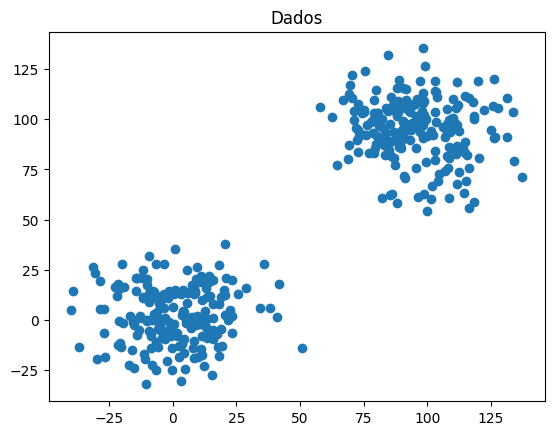

In [70]:
from sklearn.datasets import make_biclusters
import matplotlib.pyplot as plt

data = make_biclusters(shape=(400,2),n_clusters=2,noise=15,random_state=42)[0]
lista_de_coordenadas = data.tolist()

plt.scatter(data[:,0],data[:,1])
plt.title('Dados')
plt.show()

In [74]:
resultado = calcula_distancia_euclidiana(lista_de_coordenadas)

In [ ]:
resultado

6. Altere o salário de joão para 8500.

In [26]:
empregados = {
     'emp1': {'nome': 'João', 'salario': 7500},
     'emp2': {'nome': 'Patrícia', 'salario': 8000},
     'emp3': {'nome': 'Juliana', 'salario': 6500}
}

In [27]:
for empregado_numero,info in empregados.items():
    for nome in info.keys():
        if info[nome] == 'João':
            empregados[empregado_numero]['salario'] = 8500

In [28]:
empregados

{'emp1': {'nome': 'João', 'salario': 8500},
 'emp2': {'nome': 'Patrícia', 'salario': 8000},
 'emp3': {'nome': 'Juliana', 'salario': 6500}}

7. Considere a lista abaixo para resolver as próximas questões.

In [32]:
lista_original = [15,16,17,58,95,68,35,12,12,12,44,87,95,66,78,10,12,73,155,788,157,15,25,77,185,167,142,135,172,111,121,100,101,135,196,117,156,125,189,147,155,178,142,143,156,189,178,112,113,154,144]

8. Crie um função que recebe uma lista e retorna o seu desvio padrão (populacional).

Definição matemática do desvio padrão populacional: $$\sigma=\sqrt{{\sum_{i=1}^{n} (x_i-\overline{x})^2}\over{n}}$$
Onde:  
* $n$ é o tamanho da população  
* $x_i$ é o i-ésimo elemento da lista de valores   
* e a média é dado por: $$\overline{x}=\frac{1}{n}\sum_{i=1}^{n}{x_i}$$

In [65]:
def calcula_desvio_padrao_populacional(valores: list) -> float:
    numero_elementos: int = len(valores)
    soma: int = 0 # para a media
    somatorio: float = 0 # para o somatório
    for valor in valores:
        soma += valor
    media = soma / numero_elementos  # media dos valores na lista
    for valor in valores:
        somatorio += (valor - media)**2
    desvio = (somatorio/(numero_elementos-1))**0.5
    return round(desvio, 2)

In [66]:
desvio_padrao = calcula_desvio_padrao_populacional(lista_original)
print(f"Desvio padrão: {desvio_padrao}")

Desvio padrão: 112.31


9. SDR (Standard Deviation Reduction) é o cálculo de redução do desvio padrão depois da quebra de um dataset utilizando uma regra. Ele consiste na seguinte fórmula.

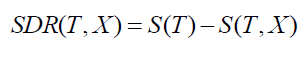

Onde :

*   SDR(T,X) é redução do desvio padrão original T dado a regra X
*   S(T) é o desvio padrão original
*   S(T,X) é o desvio padrão ponderado utilizando a regra X.


(use desvio populacional)



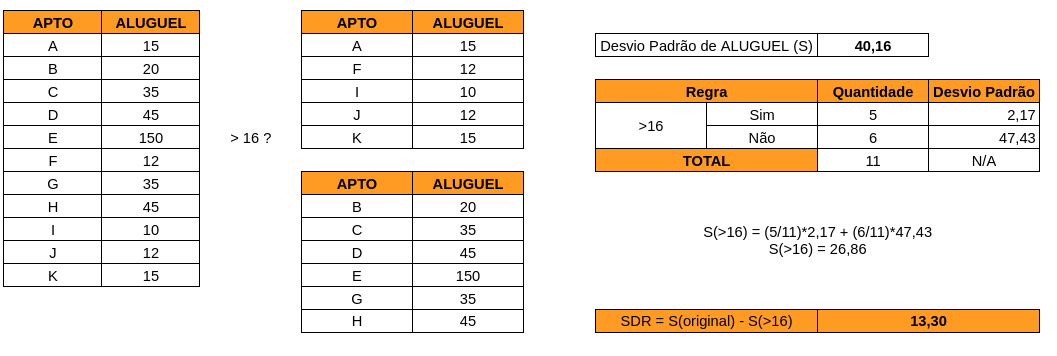

Utilizando a imagem acima como exemplo. Em um dataset de vários aluguéis utilizamos uma regra de separação quanto ao valor ser maior do que 16. Assim temos dois subsets. O primeiro tem 5 valores e um desvio padrão de 2,17, já o segundo tem 6 valores e um desvio padrão de 47,43. O desvio padrão ponderado de ambos é 26,86. A diferença entre o desvio padrão original (40,16) e dado a regra (26,86) é 13,30. 

Crie um código que calcule o SDR da lista_original para cada um dos possíveis valores de regra entre 0 e 200. Guarde todos os valores de SDR em uma lista e a passe para a função plot_sdr já definida aqui.

In [60]:
alugueis = {'A': 15, 'B': 20, 'C': 35, 'D': 45, 'E': 150, 'F': 12, 'G': 35, 'H': 45, 'I': 10, 'J': 12, 'K': 15}
alugueis

{'A': 15,
 'B': 20,
 'C': 35,
 'D': 45,
 'E': 150,
 'F': 12,
 'G': 35,
 'H': 45,
 'I': 10,
 'J': 12,
 'K': 15}

In [61]:
print(alugueis.values())

dict_values([15, 20, 35, 45, 150, 12, 35, 45, 10, 12, 15])


In [62]:
type(alugueis.values())

dict_values

In [67]:
def sdr_calculator(alugueis: dict):
    sim = {}
    nao = {}
    numero_elementos = len(alugueis)
    for imovel,valor in alugueis.items():
        if valor > 16:
            sim[imovel] = valor
        else:
            nao[imovel] = valor
    dp_sim = calcula_desvio_padrao_populacional(sim.values())
    dp_nao = calcula_desvio_padrao_populacional(nao.values())
    print(f'dp_sim: {dp_sim}', f'dp_nao: {dp_nao}')
    s_maior_16 = (1/numero_elementos)*(dp_sim*len(sim) + dp_nao*len(nao))
    desvio = calcula_desvio_padrao_populacional(alugueis.values())
    resultado = desvio - s_maior_16
    return round(resultado, 2)

In [68]:
desvio = sdr_calculator(alugueis)
print(f'SDR: {desvio}')

dp_sim: 47.43 dp_nao: 2.17
SDR: 13.3


#### OBS: Os resultados do valor do desvio padrao original e do SDR só batem com o enunciado se o desvio padrão for calculado como amostral

In [98]:
import matplotlib.pyplot as plt

def plot_sdr(lista_de_sdr):
    f,ax = plt.subplots(1,1,figsize=(16,6))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)


    ax.set_title('Comportamento de SDR',fontsize=25)
    ax.set_ylabel('SDR',fontsize=15)
    ax.plot(lista_de_sdr)

    plt.show()

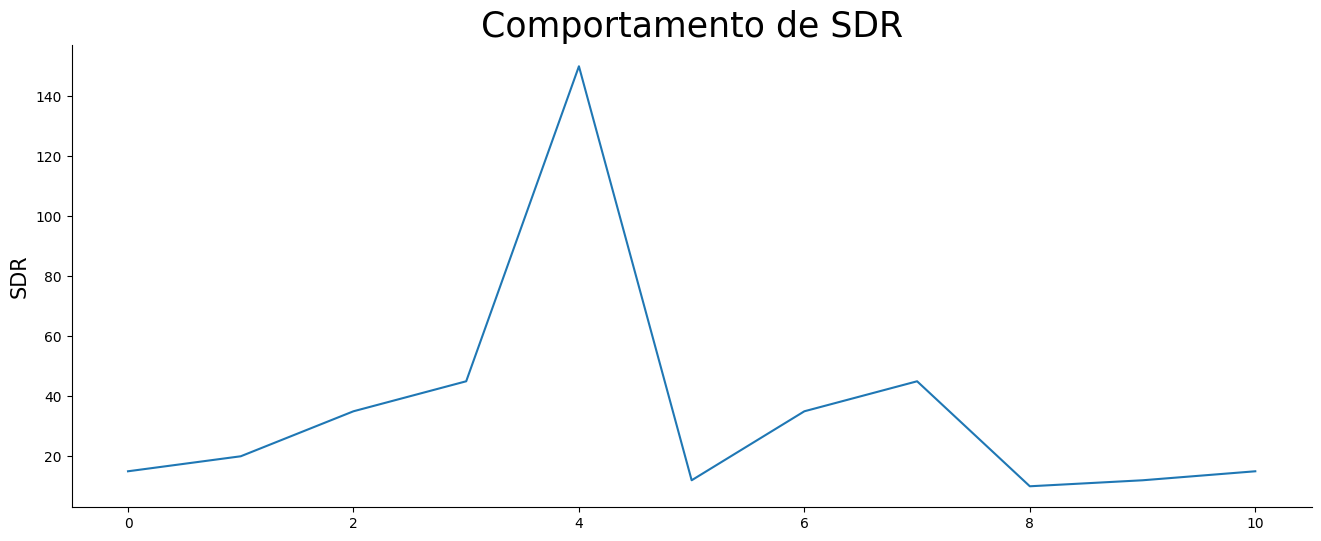

In [99]:
plot_sdr(alugueis.values())

## Questão 1

In [52]:
def get_reverse_list(entrada):
    entrada.sort(reverse=True)
    return entrada

In [55]:
entrada = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
saida = get_reverse_list(entrada)
saida

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

## Questão 2

In [5]:
def concatena_listas(primeira_lista, segunda_lista):
    saida = []
    for x,y in zip(primeira_lista, segunda_lista):
        saida.append(x+y)
    return saida

In [6]:
lista1 = ['Na','Ma','Jo']
lista2 = ['sser','ria','ão']

In [7]:
saida = concatena_listas(lista1, lista2)

In [8]:
saida

['Nasser', 'Maria', 'João']

## Questão 3

In [110]:
estoque = {'banana': 10, 'maçã': 2, 'uva': 0, 'beterraba': 11, 'ovos': 0, 'bacon': 5, 'pão integral': 12}
estoque

{'banana': 10,
 'maçã': 2,
 'uva': 0,
 'beterraba': 11,
 'ovos': 0,
 'bacon': 5,
 'pão integral': 12}

## Questão 3.1

In [111]:
precos = {'banana': 1.99, 'maçã': 1.99, 'uva': 4.56, 'beterraba': 7.5, 'ovos': 10, 'bacon': 12.99, 'pão integral': 8.38}
precos

{'banana': 1.99,
 'maçã': 1.99,
 'uva': 4.56,
 'beterraba': 7.5,
 'ovos': 10,
 'bacon': 12.99,
 'pão integral': 8.38}

## Questão 3.2

In [142]:
def comprar_carrinho(alimentos):
    valor_total = 0
    for item in alimentos:
        if estoque.get(item):
            valor_total += precos.get(item)
    return valor_total

In [143]:
alimentos = ['banana', 'ovos', 'leite', 'uva', 'maçã']

In [144]:
preco_a_pagar = comprar_carrinho(alimentos)

In [145]:
preco_a_pagar

3.98

## Questão 3.3

In [112]:
def comprar_carrinho_atualizando_estoque(alimentos: list) -> tuple:
    valor_total = 0
    for item in alimentos:
        if estoque.get(item):
            valor_total += precos.get(item)
            estoque[item] -= 1
    return valor_total, estoque

In [113]:
alimentos = ['banana', 'ovos', 'leite', 'uva', 'maçã']

In [114]:
preco_a_pagar, estoque_atualizado = comprar_carrinho_atualizando_estoque(alimentos)

In [115]:
preco_a_pagar

3.98

In [116]:
estoque_atualizado

{'banana': 9,
 'maçã': 1,
 'uva': 0,
 'beterraba': 11,
 'ovos': 0,
 'bacon': 5,
 'pão integral': 12}